In [1]:
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)
(x_train_img, y_train_label), \
(x_test_img, y_test_label) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print('Train data',x_train_img.shape,',Train Label',y_train_label.shape)
print('Train data',x_test_img.shape,',Test Label',y_test_label.shape)

Train data (50000, 32, 32, 3) ,Train Label (50000, 1)
Train data (10000, 32, 32, 3) ,Test Label (10000, 1)


In [3]:
label_dict={0:'airplane',
           1:'automible',
           2:'bird',
           3:'cat',
           4:'deer',
           5:'dog',
           6:'frog',
           7:'hourse',
           8:'ship',
           9:'truck'}

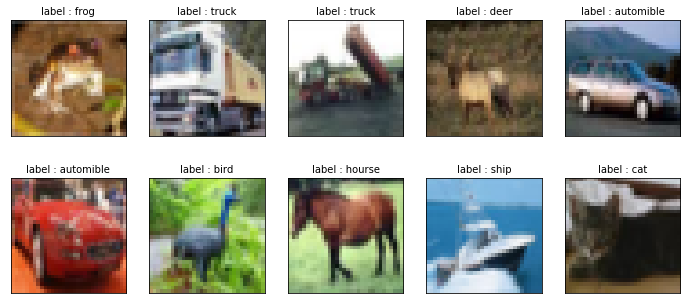

In [4]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14) #設定顯示圖形大小
    if num>25: num =25 #顯示的資料筆數，上限為25
    for i in range(0,num):
        ax =plt.subplot(5,5,1+i) #建立子圖形有五行五列
        ax.imshow(images[idx], cmap='binary')
        title = "label : " + str(label_dict[labels[idx][0]]) #建立子圖形title之標籤欄位
        if len(prediction)>0: #假如有傳入預測結果
            title += ", predict=" + str(label_dict[prediction[idx]]) #子圖形title加入預測結果
        ax.set_title(title,fontsize=10) #設定子圖形的標題title與大小
        ax.set_xticks([]); ax.set_yticks([]) #設定不顯示刻度
        idx+=1 #讀取下一筆
    plt.show()
plot_images_labels_prediction(x_train_img,y_train_label,[],0)

In [5]:
x_train_img[0][0][0] #查看訓練資料影像的第1個點

array([59, 62, 63], dtype=uint8)

In [6]:
# 訓練資料標準化 (本身已為4D矩陣)
x_train_img_normalize = x_train_img.astype('float32') / 255.0
x_test_img_normalize = x_test_img.astype('float32') / 255.0

In [7]:
x_train_img_normalize[0][0][0]

array([ 0.23137255,  0.24313726,  0.24705882], dtype=float32)

In [8]:
# 針對Label做OneHotEncode
from keras.utils import np_utils
y_train_OneHot = np_utils.to_categorical(y_train_label)
y_test_OneHot = np_utils.to_categorical(y_test_label)

In [9]:
print(y_train_OneHot.shape)
y_train_OneHot[:5] #前5筆測試資料對應label

(50000, 10)


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
model = Sequential()

#建立卷積層1
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32,32,3),
                 activation='relu',
                 padding='same'))

#隨機捨棄25%的神經元
model.add(Dropout(0.25))

#建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

#建立卷積層2
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation='relu',
                 padding='same'))
#隨機捨棄25%的神經元
model.add(Dropout(0.25))

#建立池化層2
model.add(MaxPooling2D(pool_size=(2,2)))

#建立平坦層
model.add(Flatten())
#隨機捨棄25%的神經元
model.add(Dropout(0.25))

model.add(Dense(1024,activation='relu'))
#隨機捨棄25%的神經元
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [11]:
# 模行訓練方式設定
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
train_history = model.fit(x_train_img_normalize,
                          y_train_OneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=128,
                          verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 97s - loss: 1.4882 - acc: 0.4642 - val_loss: 1.2724 - val_acc: 0.5800
Epoch 2/10
 - 97s - loss: 1.1341 - acc: 0.5952 - val_loss: 1.1282 - val_acc: 0.6272
Epoch 3/10
 - 98s - loss: 0.9799 - acc: 0.6558 - val_loss: 1.0134 - val_acc: 0.6646
Epoch 4/10
 - 96s - loss: 0.8731 - acc: 0.6912 - val_loss: 0.9626 - val_acc: 0.6933
Epoch 5/10
 - 96s - loss: 0.7823 - acc: 0.7264 - val_loss: 0.8716 - val_acc: 0.7037
Epoch 6/10
 - 97s - loss: 0.6964 - acc: 0.7559 - val_loss: 0.8667 - val_acc: 0.7061
Epoch 7/10
 - 101s - loss: 0.6249 - acc: 0.7816 - val_loss: 0.8352 - val_acc: 0.7154
Epoch 8/10
 - 100s - loss: 0.5559 - acc: 0.8063 - val_loss: 0.7777 - val_acc: 0.7397
Epoch 9/10
 - 96s - loss: 0.4894 - acc: 0.8273 - val_loss: 0.7550 - val_acc: 0.7453
Epoch 10/10
 - 96s - loss: 0.4255 - acc: 0.8515 - val_loss: 0.7769 - val_acc: 0.7334


In [13]:
from keras.models import load_model
model.save('E:/WorkSpace/TensorFlowWorkSpace/Saved_model/CNN_model.h5') 
del model  # deletes the existing model
model = load_model('E:/WorkSpace/TensorFlowWorkSpace/Saved_model/CNN_model.h5')

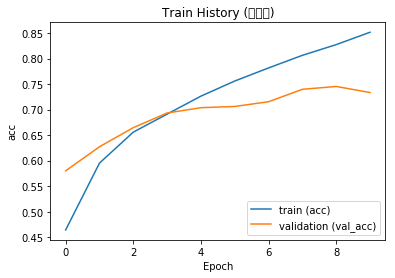

In [14]:
def show_train_history(train_history,train,validation,title):
    plt.plot(train_history.history[train]) #acc
    plt.plot(train_history.history[validation]) #val_acc
    plt.title('Train History ('+ title + ')')
    plt.xlabel('Epoch')
    plt.ylabel(train)
    plt.legend(['train (acc)','validation (val_acc)'],
    loc='lower right')
show_train_history(train_history,'acc','val_acc','準確率')

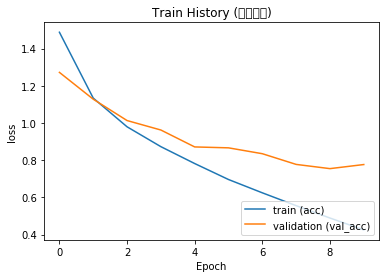

In [15]:
show_train_history(train_history,'loss','val_loss','損失函數')

In [16]:
# 評估模型準確綠
scores = model.evaluate(x_test_img_normalize,
               y_test_OneHot,
               verbose=0)
scores[1]

0.72589999999999999

In [17]:
# 執行預測
prediction = model.predict_classes(x_test_img_normalize)
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=int64)

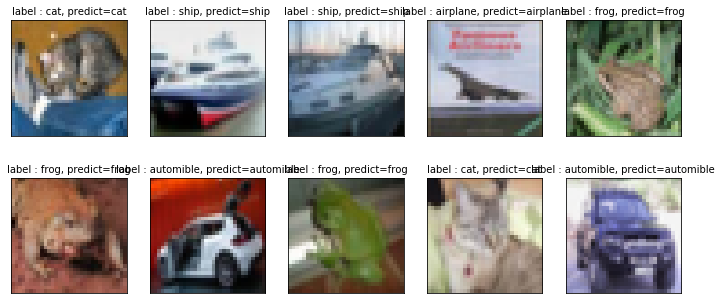

In [18]:
# 查看前10張預測結果
plot_images_labels_prediction(x_test_img,
                              y_test_label,
                              prediction,0,10)

In [19]:
# 使用標準化後的測試資料取得預測機率
Predicted_Proability = model.predict(x_test_img_normalize)
Predicted_Proability.shape # D-1:資料數 , D-2:Label數 
# Predicted_Proability[i][label] = 第i筆測試資料，預測為label的機率

(10000, 10)

label: cat


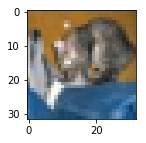

airplane Probability:0.000992049
automible Probability:0.001584718
bird Probability:0.006412702
cat Probability:0.731212854
deer Probability:0.007293296
dog Probability:0.197601900
frog Probability:0.047164142
hourse Probability:0.000877111
ship Probability:0.006070587
truck Probability:0.000790641
label: ship


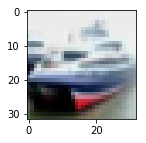

airplane Probability:0.003965683
automible Probability:0.152284920
bird Probability:0.000001568
cat Probability:0.000014832
deer Probability:0.000000521
dog Probability:0.000000330
frog Probability:0.000003798
hourse Probability:0.000000013
ship Probability:0.842615306
truck Probability:0.001112918


In [20]:
def show_Predicted_Proability(y, # y :真實結果
                              prediction, # prediction 預測結果
                              x_img, # x_img 預測影像
                              Predicted_Proability, # 預測機率
                              idx): # idx 真實結果資料索引
    print('label:',label_dict[y[idx][0]]) # y[idx][0] : 真實結果Label編號
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_img[idx],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Proability[idx][j])) 

# 查看前2筆照片的預測機率
for i in range(0,2):
    show_Predicted_Proability(y_test_label,
                  prediction,
                  x_test_img,
                  Predicted_Proability,i)

In [21]:
print(label_dict)
pd.crosstab(y_test_label.reshape(-1),
            prediction,rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automible', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'hourse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,770,2,83,13,20,5,27,6,49,25
1,23,776,25,12,7,7,29,3,29,89
2,51,2,643,38,101,40,99,16,6,4
3,12,3,104,504,79,138,126,21,6,7
4,19,0,73,39,757,14,72,20,6,0
5,8,3,66,164,66,583,66,34,6,4
6,4,1,39,26,18,8,900,0,4,0
7,12,0,49,39,99,62,17,717,3,2
8,60,23,32,9,14,7,18,2,817,18


      label  predict
3472      7        9
9923      7        9


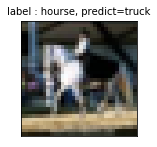

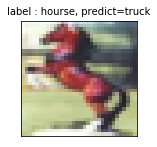

In [22]:
#建立真實值&預測DataFrame
df = pd.DataFrame({'label':y_test_label.reshape(-1),'predict':prediction})
temp_df = df[(df.label==7)&(df.predict==9)]
print(temp_df)
error_list = temp_df.index.tolist()
for index,item in enumerate(error_list):
    plot_images_labels_prediction(x_test_img,
                              y_test_label,
                              prediction,item,num=1)